# Age Prediction using Linear Regression

In [5]:
import pandas as pd
import zipfile
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Read and process CSV data

csv_filename = 'truncated_train.csv'
zip_filename = 'truncated-train.zip'

# Read CSV file into pandas DataFrame
df = pd.read_csv(csv_filename)

# Extract filenames and relevant columns
filenames = df['filename'].tolist()
ages = df['age'].tolist()

# Step 2: Extracting Acoustic Features

def extract_features(filename):
    # Load audio file using librosa
    audio_path = os.path.join('truncated-train', filename)  # Assuming audio files extracted to 'truncated' folder
    y, sr = librosa.load(audio_path)
    
    # Extract pitch (fundamental frequency) using librosa
    pitch, _ = librosa.piptrack(y=y, sr=sr)
    avg_pitch = np.mean(pitch)
    
    
    # Calculate intensity (root mean square energy)
    rms = librosa.feature.rms(y=y)
    avg_intensity = np.mean(rms)
    
    # Calculate duration (in seconds)
    duration = librosa.get_duration(y=y, sr=sr)
    
    # Calculate spectral features (e.g., spectral centroid, bandwidth)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    avg_spectral_centroid = np.mean(spectral_centroid)
    
    return {
        'average_pitch': avg_pitch,
        'average_intensity': avg_intensity,
        'duration_seconds': duration,
        'average_spectral_centroid': avg_spectral_centroid
    }

# Step 3: Organizing Features into DataFrames

feature_list = []
for filename in filenames:
    try:
        features = extract_features(filename)
        features['filename'] = filename
        feature_list.append(features)
    except Exception as e:
        print(f"Error processing {filename}: {e}")


# Create DataFrame from feature_list
feature_df = pd.DataFrame(feature_list)

# Merge with original DataFrame based on filename
merged_df = pd.merge(df, feature_df, on='filename', how='inner')



In [7]:
feature_df

,average_pitch,average_intensity,duration_seconds,average_spectral_centroid,filename
0,31.133337,0.065184,4.104036,2194.864245,cv-valid-train/sample-000000.mp3
1,101.930595,0.001252,7.560000,3170.069502,cv-valid-train/sample-000001.mp3
2,27.821905,0.041539,5.064036,2866.001345,cv-valid-train/sample-000002.mp3
3,43.950123,0.007681,6.648027,2436.612042,cv-valid-train/sample-000003.mp3
4,17.333809,0.386169,4.896009,2406.467948,cv-valid-train/sample-000004.mp3
...,...,...,...,...,...
14996,48.923454,0.043403,3.384036,1743.580175,cv-valid-train/sample-014996.mp3
14997,14.880785,0.028516,11.640000,2666.850137,cv-valid-train/sample-014997.mp3
14998,17.498768,0.074364,4.704036,2828.373718,cv-valid-train/sample-014998.mp3
14999,22.551756,0.072214,8.304036,2159.182047,cv-valid-train/sample-014999.mp3


## DATA PREPROCESSING

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

# Load training and testing datasets
train_df = pd.read_csv('truncated_train.csv')

# Check for missing values in training dataset
print("Missing values in training dataset:")
print(train_df.isnull().sum())

# Impute missing values in training dataset
imputer = SimpleImputer(strategy='mean')  # Use mean imputation for numeric columns
train_df.fillna(train_df.mean(), inplace=True)

# Separate features and target variables
X_train = train_df.drop(['age', 'gender', 'accent'], axis=1)
y_train = train_df['age']

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [5]:
import pandas as pd

# Load training dataset
train_df = pd.read_csv('truncated_train.csv')

# Check for missing values in training dataset
print("Missing values in training dataset before preprocessing:")
print(train_df.isnull().sum())

# Drop rows with any null values in any column
train_df.dropna(inplace=True)

# Check if there are any rows left after dropping missing values
if train_df.empty:
    print("No valid samples left after dropping rows with missing values.")
else:
    # Separate features and target variables
    X_train = train_df.drop(['age', 'gender', 'accent'], axis=1)
    y_train = train_df['age']

    # Scale features using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Create a new DataFrame with scaled features
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

    # Display the scaled features DataFrame
    print("Scaled Features (X_train_scaled_df):")
    print(X_train_scaled_df)


Missing values in training dataset before preprocessing:
filename          0
text              0
up_votes          0
down_votes        0
age            9386
gender         9375
accent        10068
duration      15001
dtype: int64
No valid samples left after dropping rows with missing values.


In [ ]:
import os
import librosa
import numpy as np
import pandas as pd

def extract_features(filename):
    # Load audio file using librosa
    audio_path = os.path.join('truncated-train', filename)
    y, sr = librosa.load(audio_path)
    
    # Extract pitch (fundamental frequency) using librosa
    pitch, _ = librosa.piptrack(y=y, sr=sr)
    avg_pitch = np.mean(pitch)
    
    # Calculate intensity (root mean square energy)
    rms = librosa.feature.rms(y=y)
    avg_intensity = np.mean(rms)
    
    # Calculate spectral features (e.g., spectral centroid, bandwidth)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    avg_spectral_centroid = np.mean(spectral_centroid)
    
    # Calculate duration (in seconds)
    duration = librosa.get_duration(y=y, sr=sr)
    
    return {
        'average_pitch': avg_pitch,
        'average_intensity': avg_intensity,
        'duration_seconds': duration,
        'average_spectral_centroid': avg_spectral_centroid
    }

# Read CSV file into pandas DataFrame
csv_filename = 'truncated_train.csv'
df = pd.read_csv(csv_filename)

# Extract filenames
filenames = df['filename'].tolist()

# Apply extract_features function to each filename
features_list = [extract_features(filename) for filename in filenames]

# Create DataFrame from the extracted features
feature_df = pd.DataFrame(features_list)

# Merge the feature DataFrame with the original DataFrame based on filename
merged_df = pd.merge(df, feature_df, left_on='filename', right_index=True, how='inner')

# Display the merged DataFrame
print(merged_df.head())


In [10]:
merged_df

,filename,text,up_votes,down_votes,age,gender,accent,duration,average_pitch,average_intensity,duration_seconds,average_spectral_centroid
5,cv-valid-train/sample-000005.mp3,a shepherd may like to travel but he should ne...,1,0,twenties,female,us,NaN,15.154385,0.006928,5.832018,1827.311994
8,cv-valid-train/sample-000008.mp3,put jackie right on the staff,3,0,seventies,male,us,NaN,45.197166,0.015059,1.728027,2405.960497
13,cv-valid-train/sample-000013.mp3,but he had found a guide and didn't want to mi...,1,0,thirties,female,us,NaN,34.405575,0.038097,4.224036,1853.162931
14,cv-valid-train/sample-000014.mp3,as they began to decorate the hallway a silhou...,1,0,sixties,male,england,NaN,6.007706,0.032311,5.376009,1844.103885
19,cv-valid-train/sample-000019.mp3,then they got ahold of some dough and went goofy,1,0,fifties,male,australia,NaN,10.936522,0.045045,3.720000,1910.189138
...,...,...,...,...,...,...,...,...,...,...,...,...
14993,cv-valid-train/sample-014993.mp3,but the marketplace was empty and he was far f...,1,0,fourties,male,us,NaN,12.031152,0.014189,7.464036,2491.091548
14994,cv-valid-train/sample-014994.mp3,i have already described the appearance of tha...,2,0,thirties,female,canada,NaN,44.307358,0.024267,6.696009,2661.524016
14995,cv-valid-train/sample-014995.mp3,i'm afraid i already know a great many people,2,0,thirties,male,us,NaN,38.713684,0.073049,3.024036,1617.040838
14998,cv-valid-train/sample-014998.mp3,for at that time it had not occurred to him th...,1,0,fourties,male,newzealand,NaN,17.498768,0.074364,4.704036,2828.373718


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting each feature against age group
features_to_plot = ['average_pitch', 'average_intensity', 'duration_seconds', 'average_spectral_centroid']
age_groups = merged_df['age']

# Set up subplots for each feature
fig, axes = plt.subplots(nrows=len(features_to_plot), figsize=(12, 10), sharex=True)

# Loop through each feature and create a plot
for idx, feature in enumerate(features_to_plot):
    sns.boxplot(x=age_groups, y=merged_df[feature], ax=axes[idx])
    axes[idx].set_title(f'{feature} vs. Age Group')
    axes[idx].set_ylabel(feature)
    axes[idx].set_xlabel('Age Group')

plt.tight_layout()
plt.show()


## Standardization

In [47]:
import pandas as pd
import numpy as np

# Assuming standardized_df and merged_df are already defined
# Drop rows where 'age' column has null values
merged_df = merged_df.dropna(subset=['age'])

# Define the features to standardize
features_to_standardize = ['average_pitch', 'average_intensity', 'duration_seconds', 'average_spectral_centroid']

# Calculate mean (μ) and standard deviation (σ) for each feature
feature_means = standardized_df[features_to_standardize].mean()
feature_stds = standardized_df[features_to_standardize].std()

# Standardize each feature
standardized_features = (standardized_df[features_to_standardize] - feature_means) / feature_stds

# Combine standardized features with filename and age columns
merged_standardized_df = pd.concat([standardized_df[['filename']], standardized_features, merged_df['age']], axis=1)

# Drop rows where 'age' column has null values
merged_standardized_df = merged_standardized_df.dropna(subset=['age'])

# Display the merged and standardized DataFrame
print("Merged and Standardized DataFrame:")
merged_standardized_df


Merged and Standardized DataFrame:


,filename,average_pitch,average_intensity,duration_seconds,average_spectral_centroid,age
1,cv-valid-train/sample-000001.mp3,3.028580,-1.177811,1.580319,1.519177,twenties
3,cv-valid-train/sample-000003.mp3,0.361773,-1.004405,1.121052,0.255348,twenties
5,cv-valid-train/sample-000005.mp3,-0.962685,-1.024704,0.710113,-0.794545,twenties
6,cv-valid-train/sample-000006.mp3,1.010056,0.433624,1.713287,0.716612,twenties
7,cv-valid-train/sample-000007.mp3,-0.475855,2.121614,-0.510602,-0.687209,thirties
...,...,...,...,...,...,...
3976,cv-valid-train/sample-003976.mp3,-1.211461,-0.895616,-0.595220,-0.320833,thirties
3979,cv-valid-train/sample-003979.mp3,0.656551,-1.011908,-0.280957,-0.727133,thirties
3980,cv-valid-train/sample-003980.mp3,-0.471544,-0.378783,-0.522683,-0.545389,fifties
3984,cv-valid-train/sample-003984.mp3,-0.422882,1.127544,0.625518,0.476579,thirties


In [60]:
import pandas as pd
import numpy as np

# Assuming standardized_df and merged_df are already defined
# Drop rows where 'age' column has null values
merged_df = merged_df.dropna(subset=['age'])

# Define the features to standardize
features_to_standardize = ['average_pitch', 'average_intensity', 'duration_seconds', 'average_spectral_centroid']

# Calculate mean (μ) and standard deviation (σ) for each feature
feature_means = standardized_df[features_to_standardize].mean()
feature_stds = standardized_df[features_to_standardize].std()

# Standardize each feature
standardized_features = (standardized_df[features_to_standardize] - feature_means) / feature_stds

# Combine standardized features with filename and age columns
merged_standardized_df = pd.concat([standardized_df[['filename']], standardized_features, merged_df['age']], axis=1)

# Drop rows where 'age' column has null values
merged_standardized_df = merged_standardized_df.dropna(subset=['age'])

# Encode 'age' column using age_mapping dictionary
age_mapping = {
    'teens': 1,
    'twenties': 2,
    'thirties': 3,
    'fourties': 4,
    'fifties': 5,
    'sixties': 6,
    'seventies': 7,
    'eighties': 8,
    'nineties': 9
}

merged_standardized_df['age_encoded'] = merged_standardized_df['age'].map(age_mapping)

# Display the merged, standardized, and encoded DataFrame
print("Merged, Standardized, and Encoded DataFrame:")
merged_standardized_df


Merged, Standardized, and Encoded DataFrame:


,filename,average_pitch,average_intensity,duration_seconds,average_spectral_centroid,age,age_encoded
1,cv-valid-train/sample-000001.mp3,3.028580,-1.177811,1.580319,1.519177,twenties,2
3,cv-valid-train/sample-000003.mp3,0.361773,-1.004405,1.121052,0.255348,twenties,2
5,cv-valid-train/sample-000005.mp3,-0.962685,-1.024704,0.710113,-0.794545,twenties,2
6,cv-valid-train/sample-000006.mp3,1.010056,0.433624,1.713287,0.716612,twenties,2
7,cv-valid-train/sample-000007.mp3,-0.475855,2.121614,-0.510602,-0.687209,thirties,3
...,...,...,...,...,...,...,...
3976,cv-valid-train/sample-003976.mp3,-1.211461,-0.895616,-0.595220,-0.320833,thirties,3
3979,cv-valid-train/sample-003979.mp3,0.656551,-1.011908,-0.280957,-0.727133,thirties,3
3980,cv-valid-train/sample-003980.mp3,-0.471544,-0.378783,-0.522683,-0.545389,fifties,5
3984,cv-valid-train/sample-003984.mp3,-0.422882,1.127544,0.625518,0.476579,thirties,3


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the standardized features (excluding 'filename' and 'age' columns)
scaled_features = scaler.fit_transform(merged_standardized_df.drop(['filename', 'age'], axis=1))

# Create a DataFrame of scaled features
scaled_df = pd.DataFrame(scaled_features, columns=merged_standardized_df.columns[1:-1])  # Exclude 'filename' and 'age'

# Add 'filename' and 'age' columns back to the scaled DataFrame
scaled_df[['filename', 'age']] = merged_standardized_df[['filename', 'age']]

# Display the scaled DataFrame
print("Scaled DataFrame:")



In [46]:
scaled_df

,average_pitch,average_intensity,duration_seconds,average_spectral_centroid,filename,age
0,0.101741,0.019488,0.085838,0.264449,NaN,NaN
1,0.312329,0.042808,0.011329,0.403260,NaN,NaN
2,0.236684,0.108885,0.056645,0.270651,NaN,NaN
3,0.037627,0.092291,0.077559,0.268477,NaN,NaN
4,0.072176,0.128815,0.047494,0.284330,NaN,NaN
...,...,...,...,...,...,...
5610,0.079849,0.040312,0.115468,0.423682,NaN,NaN
5611,0.306091,0.069218,0.101525,0.464567,cv-valid-train/sample-005611.mp3,fourties
5612,0.266882,0.209133,0.034858,0.214007,NaN,NaN
5613,0.118175,0.212905,0.065359,0.504592,cv-valid-train/sample-005613.mp3,fourties


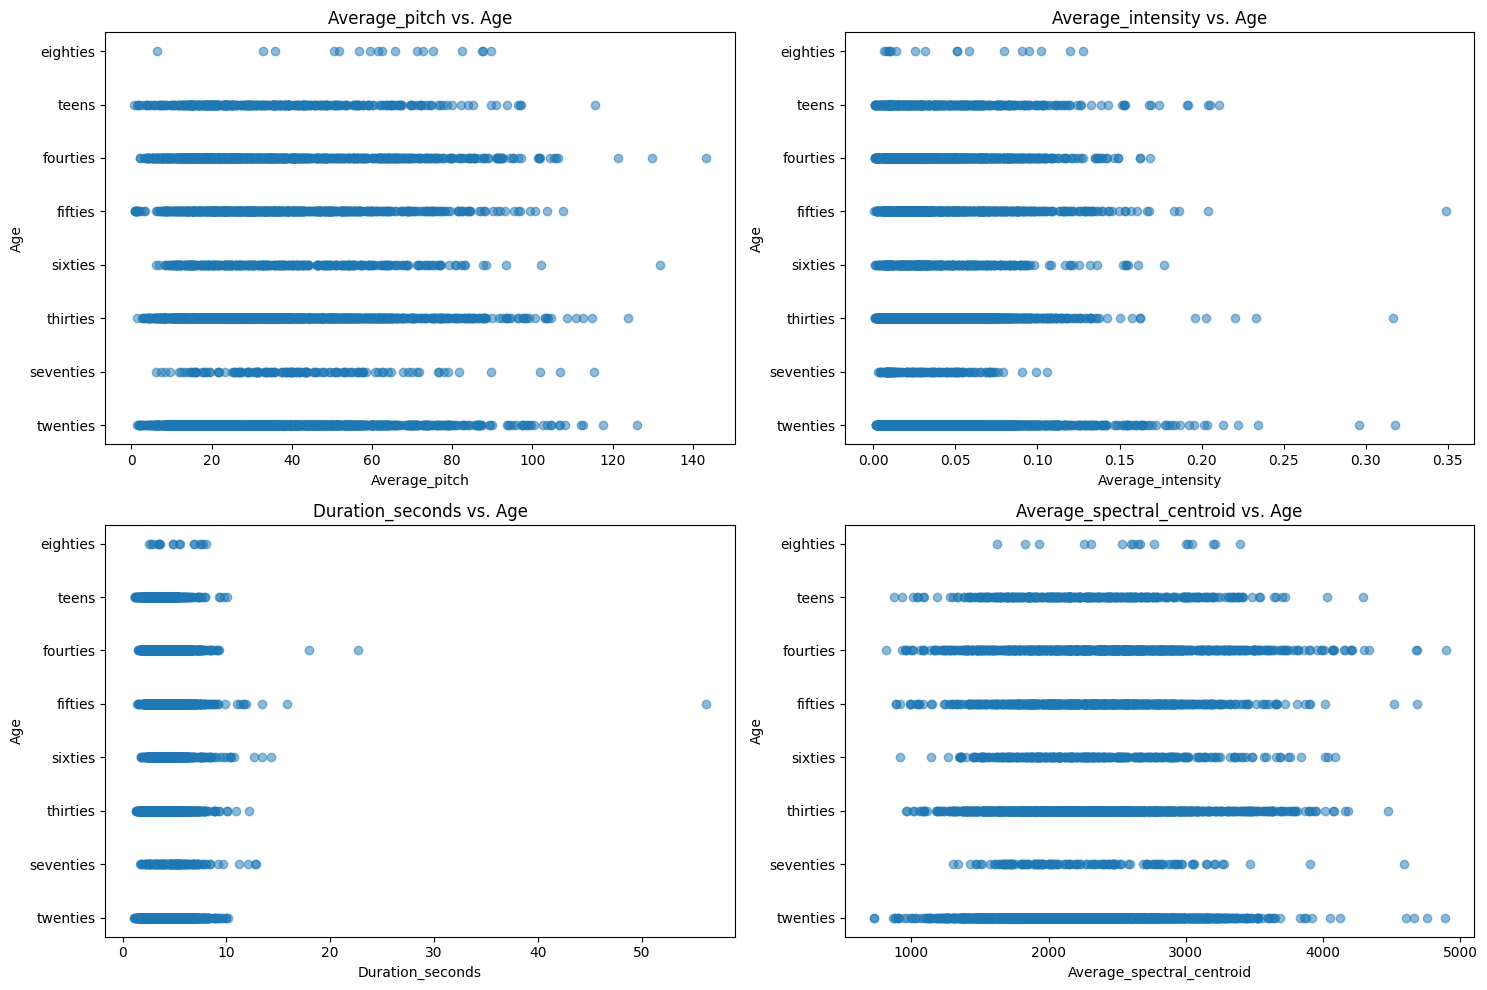

In [20]:
import matplotlib.pyplot as plt

# List of features to plot against age
features_to_plot = ['average_pitch', 'average_intensity', 'duration_seconds', 'average_spectral_centroid']

# Set up subplots
num_plots = len(features_to_plot)
num_cols = 2
num_rows = (num_plots + 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Flatten axes for easier indexing
axes = axes.flatten()

# Loop through each feature and plot against age
for i, feature in enumerate(features_to_plot):
    ax = axes[i]
    ax.scatter(merged_df[feature], merged_df['age'], alpha=0.5)
    ax.set_xlabel(feature.capitalize())  # Set feature name as xlabel
    ax.set_ylabel('Age')
    ax.set_title(f'{feature.capitalize()} vs. Age')

# Hide any unused subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [61]:
merged_standardized_df.to_csv('Output.csv')

In [62]:
output_df = merged_standardized_df.copy()
output_df.columns

Index(['filename', 'average_pitch', 'average_intensity', 'duration_seconds',
       'average_spectral_centroid', 'age', 'age_encoded'],
      dtype='object')

In [64]:
columns_to_drop = ['filename','age']
output_df.drop(columns=columns_to_drop, inplace=True)

### CORELATION 

In [65]:
output_df.corr()['age_encoded']

average_pitch                0.037586
average_intensity           -0.008555
duration_seconds            -0.007588
average_spectral_centroid    0.013005
age_encoded                  1.000000
Name: age_encoded, dtype: float64

## MODEL TRAINING

In [66]:
X = output_df[['average_pitch', 'average_intensity', 'duration_seconds', 'average_spectral_centroid']].values
y = output_df['age_encoded'].values

X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

In [67]:
# Calculating coefficients
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
intercept = coefficients[0] # First element is the intercept
feature_coefficients = coefficients[1:] # rest are coefficiets

TEST FILE HANDLING

In [68]:
df_test = pd.read_csv('cv-valid-test.csv', encoding='utf-8')
df_test

,filename,text,up_votes,down_votes,age,gender,accent,duration
0,cv-valid-test/sample-000000.mp3,without the dataset the article is useless,1,0,NaN,NaN,NaN,NaN
1,cv-valid-test/sample-000001.mp3,i've got to go to him,1,0,twenties,male,NaN,NaN
2,cv-valid-test/sample-000002.mp3,and you know it,1,0,NaN,NaN,NaN,NaN
3,cv-valid-test/sample-000003.mp3,down below in the darkness were hundreds of pe...,4,0,twenties,male,us,NaN
4,cv-valid-test/sample-000004.mp3,hold your nose to keep the smell from disablin...,2,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3990,cv-valid-test/sample-003990.mp3,the old man opened his cape and the boy was st...,1,0,NaN,NaN,NaN,NaN
3991,cv-valid-test/sample-003991.mp3,in alchemy it's called the soul of the world,2,1,NaN,NaN,NaN,NaN
3992,cv-valid-test/sample-003992.mp3,at that point in their lives everything is cle...,3,0,NaN,NaN,NaN,NaN
3993,cv-valid-test/sample-003993.mp3,he told them all to be seated,3,0,NaN,NaN,NaN,NaN


In [69]:
columnsToDrop = ['duration', 'up_votes', 'down_votes', 'gender', 'accent']
df_test.drop(columns=columnsToDrop, inplace=True)
df_test.columns

Index(['filename', 'text', 'age'], dtype='object')

In [72]:
import pandas as pd

# Drop rows where 'age' column has null values
df_test = df_test.dropna(subset=['age'])

# Map 'age' column using age_mapping dictionary to create 'age_encoded'
df_test['age_encoded'] = df_test['age'].map(age_mapping)

# Display the modified DataFrame with age_encoded
df_test


,filename,text,age,age_encoded
1,cv-valid-test/sample-000001.mp3,i've got to go to him,twenties,2
3,cv-valid-test/sample-000003.mp3,down below in the darkness were hundreds of pe...,twenties,2
5,cv-valid-test/sample-000005.mp3,down below in the darkness were hundreds of pe...,twenties,2
6,cv-valid-test/sample-000006.mp3,strange images passed through my mind,twenties,2
7,cv-valid-test/sample-000007.mp3,the sheep had taught him that,thirties,3
...,...,...,...,...
3976,cv-valid-test/sample-003976.mp3,we've got her located,thirties,3
3979,cv-valid-test/sample-003979.mp3,she has all your features,thirties,3
3980,cv-valid-test/sample-003980.mp3,i've got to see nicole right away,fifties,5
3984,cv-valid-test/sample-003984.mp3,but there were certain of them who took a bit ...,thirties,3


In [73]:
df_test.reset_index(drop=True, inplace=True)

In [77]:
import os
import librosa
import numpy as np
import pandas as pd

def extract_features(filename):
    # Load audio file using librosa
    audio_path = os.path.join('cv-valid-test', filename)
    y, sr = librosa.load(audio_path)
    
    # Extract pitch (fundamental frequency) using librosa
    pitch, _ = librosa.piptrack(y=y, sr=sr)
    avg_pitch = np.mean(pitch)
    
    # Calculate intensity (root mean square energy)
    rms = librosa.feature.rms(y=y)
    avg_intensity = np.mean(rms)
    
    # Calculate spectral centroid
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    avg_spectral_centroid = np.mean(spectral_centroid)
    
    # Calculate duration (in seconds)
    duration = librosa.get_duration(y=y, sr=sr)
    
    return {
        'average_pitch': avg_pitch,
        'average_intensity': avg_intensity,
        'duration_seconds': duration,
        'average_spectral_centroid': avg_spectral_centroid
    }

def featureExtraction(df):
    features = []  # List to store extracted features
    
    for i in range(len(df)):
        filename = df['filename'][i]
        extracted_features = extract_features(filename)
        features.append(extracted_features)
        
    return pd.DataFrame(features)


In [78]:
df_features_test = featureExtraction(df_test)
df_features_test

,average_pitch,average_intensity,duration_seconds,average_spectral_centroid
0,41.128212,0.039991,1.944036,1955.858160
1,17.719046,0.009894,7.704036,2308.464665
2,16.266485,0.045127,4.656009,1966.360052
3,81.232689,0.005734,4.680000,2991.734249
4,43.807964,0.031965,2.616009,2628.525092
...,...,...,...,...
1537,26.840361,0.053497,1.824036,1831.163581
1538,63.121037,0.002047,2.064036,2743.037921
1539,9.939067,0.024364,2.784036,1627.018451
1540,9.941351,0.084790,3.744036,1666.764603


In [79]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

## MODEL TESTING

PREDICT FUNCTIONS

In [85]:
import numpy as np

def predict_and_round(X_new, coefficients, intercept):
    # Predict the target variable using the provided coefficients and intercept
    y_pred = X_new @ coefficients + intercept
    
    # Take the absolute value of predicted values
    y_pred_abs = np.abs(y_pred)
    
    # Round up the absolute values to the nearest integer
    y_pred_rounded = np.ceil(y_pred_abs).astype(int)
    
    return y_pred_rounded

# Example usage:
# Assuming y_pred is your predicted values array

# Calculate absolute values and round up
y_pred_rounded = predict_and_round(df_features_test, feature_coefficients, intercept)

# Display the rounded predicted values
print("Rounded predicted values:", y_pred_rounded)


Rounded predicted values: 0       16
1       21
2       18
3       25
4       23
        ..
1537    16
1538    23
1539    14
1540    15
1541    21
Length: 1542, dtype: int32


In [87]:

test_data_with_predictions = df_features_test.copy()
test_data_with_predictions['age_encoded'] = df_test['age_encoded']  # Add the original age_encoded column
test_data_with_predictions['predicted_age'] = y_pred_rounded


test_data_with_predictions[:]


,average_pitch,average_intensity,duration_seconds,average_spectral_centroid,age_encoded,predicted_age
0,41.128212,0.039991,1.944036,1955.858160,2,16
1,17.719046,0.009894,7.704036,2308.464665,2,21
2,16.266485,0.045127,4.656009,1966.360052,2,18
3,81.232689,0.005734,4.680000,2991.734249,2,25
4,43.807964,0.031965,2.616009,2628.525092,3,23
...,...,...,...,...,...,...
1537,26.840361,0.053497,1.824036,1831.163581,3,16
1538,63.121037,0.002047,2.064036,2743.037921,3,23
1539,9.939067,0.024364,2.784036,1627.018451,5,14
1540,9.941351,0.084790,3.744036,1666.764603,3,15


RMS

In [88]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(df_test['age_encoded'], y_pred_rounded)
rmse = mean_squared_error(df_test['age_encoded'], y_pred_rounded, squared=False)
mae = mean_absolute_error(df_test['age_encoded'], y_pred_rounded)
r2 = r2_score(df_test['age_encoded'], y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 333.76653696498056
Root Mean Squared Error (RMSE): 18.26927850148934
Mean Absolute Error (MAE): 17.24254215304799
R-squared (R2): -261.4302469291372


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
